In [1]:
import numpy as np
import random as rnd
import collections
import matplotlib.pyplot as plt
import time
import scipy.stats as st
import math
from scipy.stats import binom
from scipy.stats import norm

from scipy.stats import bernoulli, binom, poisson, chi2
from IPython.display import clear_output
from operator import itemgetter
from statsmodels.stats import proportion

from numpy import matlib

## Exercise 1

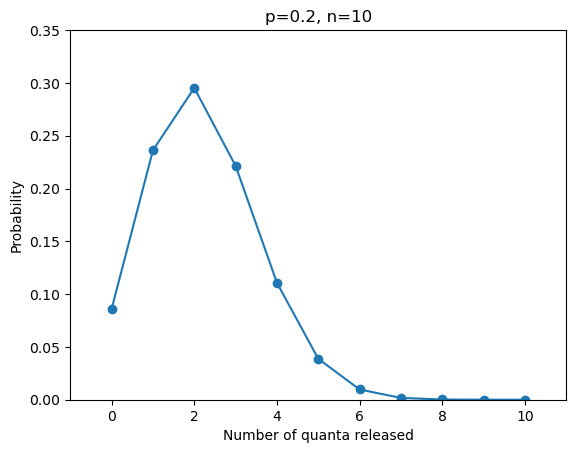

In [2]:
p_r = 0.2        # probability of release
n = 10           # sample size

bins = range(0,n+1)             # x bins for graph
Y = binom.pmf(bins, n+1, p_r)   # theoretical probability distribution

plt.plot(bins, Y, 'o-')
plt.title(f'p={p_r}, n={n}')
plt.xlabel('Number of quanta released')
plt.ylabel('Probability')
plt.axis([-1, n+1, 0, 0.35])
plt.show()

## Exercise 2

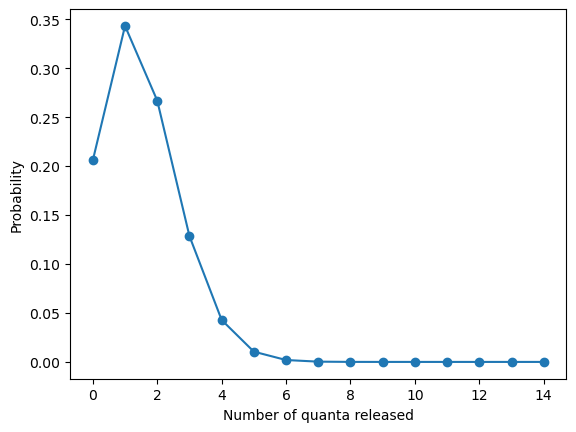

the probability of getting 8 quanta released if the probability is 0.1 is 0.00022


In [3]:
n = 14
p_r = 0.1    # probability of release
bins = range(0,n+1)             # x bins for graph

Y_01 = binom.pmf(bins, n+1, p_r)   # theoretical binomial distribution
plt.plot(bins, Y_01, 'o-')
plt.xlabel('Number of quanta released')
plt.ylabel('Probability')
plt.show()

print(f'the probability of getting 8 quanta released if the probability is {p_r} is {Y[8]:0.5f}')

if the probability of release is 0.0, the probability of getting 8 quanta released is 0.0000
if the probability of release is 0.1, the probability of getting 8 quanta released is 0.0000
if the probability of release is 0.2, the probability of getting 8 quanta released is 0.0035
if the probability of release is 0.3, the probability of getting 8 quanta released is 0.0348
if the probability of release is 0.4, the probability of getting 8 quanta released is 0.1181
if the probability of release is 0.5, the probability of getting 8 quanta released is 0.1964
if the probability of release is 0.6, the probability of getting 8 quanta released is 0.1771
if the probability of release is 0.7, the probability of getting 8 quanta released is 0.0811
if the probability of release is 0.8, the probability of getting 8 quanta released is 0.0138
if the probability of release is 0.9, the probability of getting 8 quanta released is 0.0003
if the probability of release is 1.0, the probability of getting 8 qua

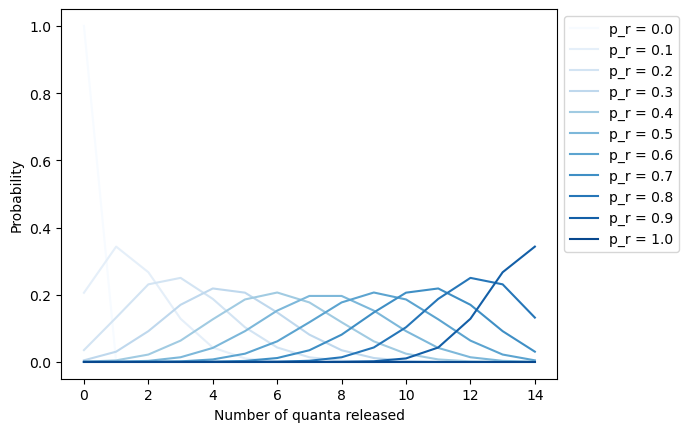

the most probable release probability is 0.5


In [4]:
n = 14
p_r = np.arange(0, 1.1, 0.1)    # list of probabilities, 0 to 1.1, spaced 0.1
bins = range(0,n+1)             # x bins for graph

color_map = plt.get_cmap("Blues")
num_lines = len(p_r)
for i, p in enumerate(p_r):             # iterate through each release probability
    Y = binom.pmf(bins, n+1, p)         # theoretical function distribution for each release probability
    color = color_map(i / num_lines)
    plt.plot(bins, Y, color = color, label = f'p_r = {p:.1f}')

    print(f'if the probability of release is {p:.1f}, the probability of getting 8 quanta released is {Y[8]:.4f}')

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Number of quanta released')
plt.ylabel('Probability')
plt.show()

print('the most probable release probability is 0.5')

## Exercise 3

In [5]:
likelihood_01 = Y_01[5] * Y_01[8]
print(f'the likelihood of these measurements is {likelihood_01}')

log_likelihood_01 = math.log10(Y_01[5]) + math.log10(Y_01[8])
print(f'the log likelihood of these measurements is {log_likelihood_01}')

the likelihood of these measurements is 3.2227494570477575e-07
the log likelihood of these measurements is -6.49177345609209


the maximum likelihood of the observed data occurs with a release probability of 0.4


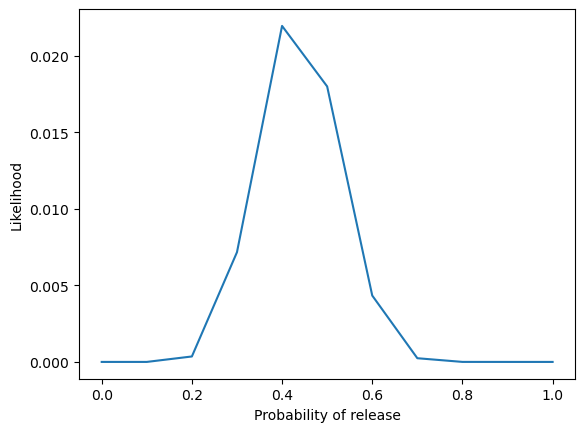

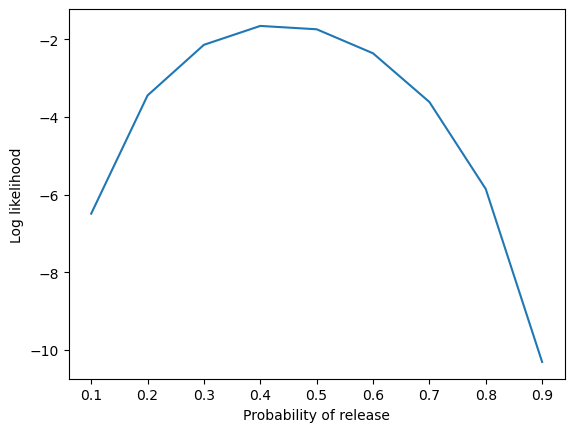

In [6]:
n = 14
p_r = np.arange(0, 1.1, 0.1)    # list of probabilities, 0 to 1.1, spaced 0.1
bins = range(0,n+1)             # x bins for graph

likelihood_all = []
log_likelihood_all = []
for i, p in enumerate(p_r):             # iterate through each release probability
    Y = binom.pmf(bins, n+1, p)         # theoretical function distribution for each release probability
    
    likelihood = Y[5] * Y[8]            # calculate likelihood
    likelihood_all.append(likelihood)
    if Y[5] > 0 and Y[8] > 0:           # check if values are positive to avoid errors
        log_likelihood = math.log10(Y[5]) + math.log10(Y[8])         # calculate log likelihood
    else:
        log_likelihood = float('-inf')  # if value isn't pos, log likelihood is negative infinity
    log_likelihood_all.append(log_likelihood)

max_likelihood = max(likelihood_all)    # find the max likelihood

print(f'the maximum likelihood of the observed data occurs with a release probability of {p_r[likelihood_all.index(max_likelihood)]}')

plt.plot(p_r, likelihood_all)
plt.xlabel('Probability of release')
plt.ylabel('Likelihood')
plt.show()
plt.plot(p_r, log_likelihood_all)
plt.xlabel('Probability of release')
plt.ylabel('Log likelihood')
plt.show()

the maximum likelihood of the observed data occurs with a release probability of 0.43


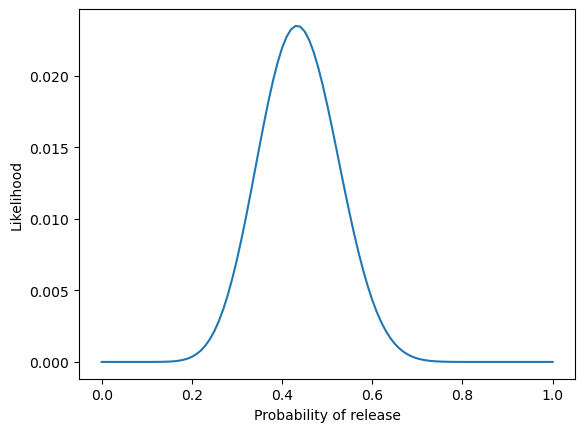

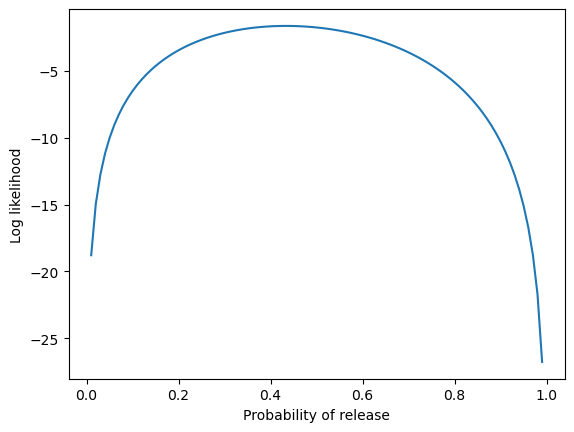

In [7]:
## computing at higher resolution
n = 14
p_r = np.arange(0, 1.01, 0.01)    # list of probabilities, 0 to 1.1, spaced 0.01
bins = range(0,n+1)             # x bins for graph

likelihood_all = []
log_likelihood_all = []
for i, p in enumerate(p_r):             # iterate through each release probability
    Y = binom.pmf(bins, n+1, p)         # theoretical function distribution for each release probability
    
    likelihood = Y[5] * Y[8]            # calculate likelihood
    likelihood_all.append(likelihood)
    if Y[5] > 0 and Y[8] > 0:           # check if values are positive to avoid errors
        log_likelihood = math.log10(Y[5]) + math.log10(Y[8])         # calculate log likelihood
    else:
        log_likelihood = float('-inf')  # if value isn't pos, log likelihood is negative infinity
    log_likelihood_all.append(log_likelihood)

max_likelihood = max(likelihood_all)    # find the max likelihood

print(f'the maximum likelihood of the observed data occurs with a release probability of {p_r[likelihood_all.index(max_likelihood)]}')

plt.plot(p_r, likelihood_all)
plt.xlabel('Probability of release')
plt.ylabel('Likelihood')
plt.show()
plt.plot(p_r, log_likelihood_all)
plt.xlabel('Probability of release')
plt.ylabel('Log likelihood')
plt.show()

## Exercise 4

[8.08207308e-05 1.26561000e-03 8.91845323e-03 3.72422060e-02
 1.02058827e-01 1.91782487e-01 2.50267713e-01 2.23946306e-01
 1.31508038e-01 4.57632553e-02 7.16628434e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


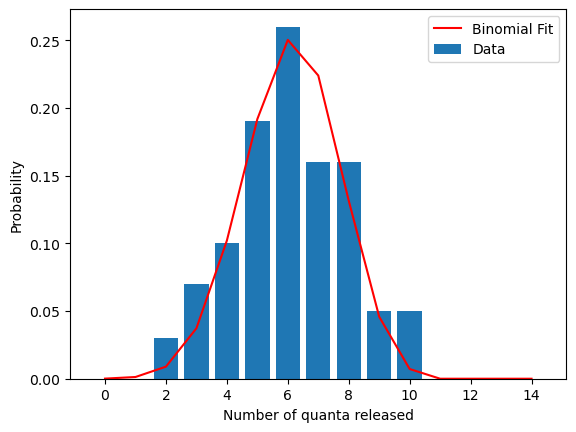

In [8]:
data = np.array([
    [0, 0],
    [1, 0],
    [2, 3],
    [3, 7],
    [4, 10],
    [5, 19],
    [6, 26],
    [7, 16],
    [8, 16],
    [9, 5],
    [10, 5],
    [11, 0],
    [12, 0],
    [13, 0],
    [14, 0]])
measured_releases = data[:,0]
count = data[:,1]
probability = count / 100

outcomes_list = np.repeat(data[:, 0], data[:, 1])    # convert data into list of all events

# fit binomial data using estimates of parameters
n = max(outcomes_list)
p = np.mean(outcomes_list) / n
fit_data = binom.pmf(measured_releases, n, p)
print(fit_data)

plt.bar(measured_releases, probability, label = 'Data')
plt.plot(fit_data, color = 'r', label = 'Binomial Fit')
plt.legend()
plt.xlabel('Number of quanta released')
plt.ylabel('Probability')
plt.show()

the maximum likelihood of the observed data occurs with a release probability of 0.000000


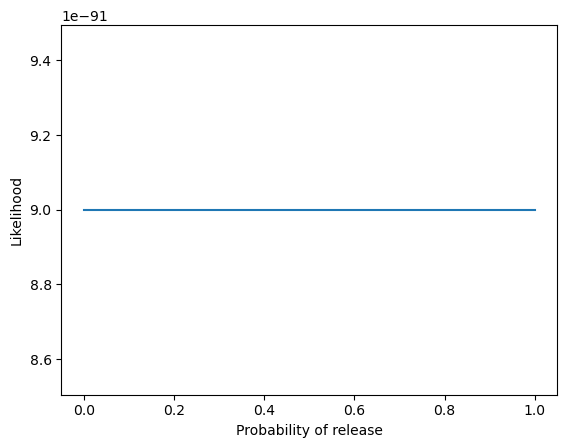

In [9]:
n = 14
p_r = np.arange(0, 1.01, 0.01)    # list of probabilities, 0 to 1.1, spaced 0.1
bins = range(0,n+1)             # x bins for graph

likelihood_all = []
for i, p in enumerate(p_r):             # iterate through each release probability    
    likelihood = [probability[0]**count[0] * probability[1]**count[1] * probability[2]**count[2] * probability[3]**count[3] * probability[4]**count[4] 
                  * probability[5]**count[5] * probability[6]**count[6] * probability[7]**count[7] * probability[8]**count[8] * probability[9]**count[9] 
                  * probability[10]**count[10] * probability[11]**count[11] * probability[12]**count[12] * probability[13]**count[13] 
                  * probability[14]**count[14]] # calculate likelihood
    likelihood_all.append(likelihood)

max_likelihood = max(likelihood_all)    # find the max likelihood

print(f'the maximum likelihood of the observed data occurs with a release probability of {p_r[likelihood_all.index(max_likelihood)]:.6f}')

plt.plot(p_r, likelihood_all)
plt.xlabel('Probability of release')
plt.ylabel('Likelihood')
plt.show()

## Exercise 5

the maximum likelihood of the observed data occurs with a release probability of 0.47


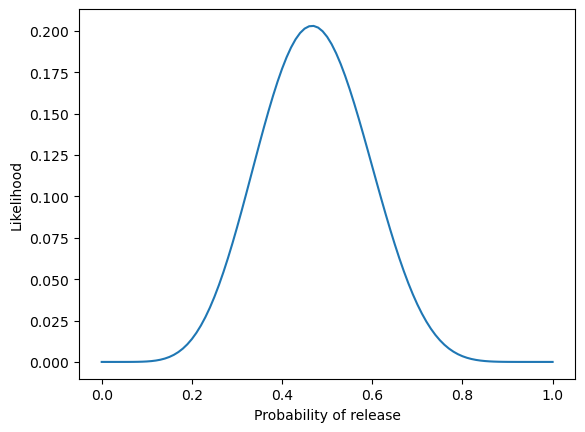

In [10]:
n = 14
p_r = np.arange(0, 1.01, 0.01)    # list of probabilities, 0 to 1.1, spaced 0.1
bins = range(0,n+1)             # x bins for graph

likelihood_all = []
for i, p in enumerate(p_r):             # iterate through each release probability
    Y = binom.pmf(bins, n+1, p)         # theoretical function distribution for each release probability
    
    likelihood = Y[7]            # calculate likelihood
    likelihood_all.append(likelihood)

max_likelihood = max(likelihood_all)    # find the max likelihood

print(f'the maximum likelihood of the observed data occurs with a release probability of {p_r[likelihood_all.index(max_likelihood)]:.2f}')

plt.plot(p_r, likelihood_all)
plt.xlabel('Probability of release')
plt.ylabel('Likelihood')
plt.show()

In [11]:
print(f'the probability of getting the measurement if the release probability remained at 0.3 is {likelihood_all[30]:.2f}')

the probability of getting the measurement if the release probability remained at 0.3 is 0.08
